# 2019-yil uchun "Həzi Aslanov-1" supermarketidagi savdo holati


In [28]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [29]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://github.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/blob/main/H%C9%99zi%20Aslanov-1.csv?raw=true", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,LUCK SIAM 565GR ANANAS DILIMLERI SIROPDA D/Q,Mevali sharbatlar,3.05,2019-04-29,True
1,"SOKOLAD ULDUZ FAVO SOKOLAD,PORTAGAL KG",Shirinliklar,11.80,2019-04-29,True
2,MARANDI 750ML YANARDAG QIRMIZI KEMSIRIN SERAB S/Q,Vinolar,5.10,2019-04-29,True
3,QINYETOGULLARI 140GR QIZIL PETEK BAL S/Q,Shirinliklar,4.00,2019-06-08,False
4,CASKA DEST 6-LI,Idish-tovoq,8.10,2019-06-08,False
5,BEHRE VITEKS 150GR RULET CIYELEKLI,Shirinliklar,0.69,2019-06-08,False
6,VOLOJKA 500GR OVSYANIE XLOPYA PAKET,Shirinliklar,1.15,2019-10-07,False
7,CAVENDISH&HARVEY 200GR MANPASI MIXED FRUIT D/Q,Shirinliklar,3.55,2019-10-07,False
8,DAMLA 348ML SU,Suvlar,0.28,2019-10-07,False
9,KOLBASA CERKIZ ONEJSKAYA S/K KG,Kolbasa va sosiskalar,27.25,2019-10-07,False


In [30]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20650 entries, 0 to 20649
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mahsulot_nomi   20650 non-null  object 
 1   mahsulot_turi   20650 non-null  object 
 2   mahsulot_narhi  20650 non-null  float64
 3   sotilgan_vaqti  20650 non-null  object 
 4   bonus_karta     20650 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 665.6+ KB


In [31]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [32]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20650 entries, 0 to 20649
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   20650 non-null  object        
 1   mahsulot_turi   20650 non-null  object        
 2   mahsulot_narhi  20650 non-null  float64       
 3   sotilgan_vaqti  20650 non-null  datetime64[ns]
 4   bonus_karta     20650 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 665.6+ KB


In [33]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2084
1843
2233
2121
2141
2082
2023
2063
2012
2031
17
0


In [34]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2084
1843
2233
2121
2141
2082
2023
2063
2012
2031
0
0


In [35]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,LUCK SIAM 565GR ANANAS DILIMLERI SIROPDA D/Q,Mevali sharbatlar,3.05,2019-04-29,True
1,"SOKOLAD ULDUZ FAVO SOKOLAD,PORTAGAL KG",Shirinliklar,11.80,2019-04-29,True
2,MARANDI 750ML YANARDAG QIRMIZI KEMSIRIN SERAB S/Q,Vinolar,5.10,2019-04-29,True
3,QINYETOGULLARI 140GR QIZIL PETEK BAL S/Q,Shirinliklar,4.00,2019-06-08,False
4,CASKA DEST 6-LI,Idish-tovoq,8.10,2019-06-08,False
...,...,...,...,...,...
20645,FOOD FO 250GR FODEKOR SEKER HAMURU AG,Maishiy buyumlar,2.85,2019-01-14,False
20646,MISTRAL 800GR KRUPA MANNAYA,Nonushta,2.05,2019-01-14,False
20647,CPL 400GR LAVANDA SOR PL/Q,Tuz,1.98,2019-01-14,False
20648,ULKER ALPELLA 100GR PUDING SOKOLADLI,Yogurt,0.65,2019-01-14,False


In [36]:
#9 2019-yilda "Həzi Aslanov-1" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,4747
Maishiy buyumlar,1161
"Yuvish vositalari, tozalagichlar",1048
Mevali sharbatlar,958
Idish-tovoq,773
...,...
Kefir,16
Shampan,15
Tayyor ovqatlar,11
Muzlatilgan mahsulotlar,6


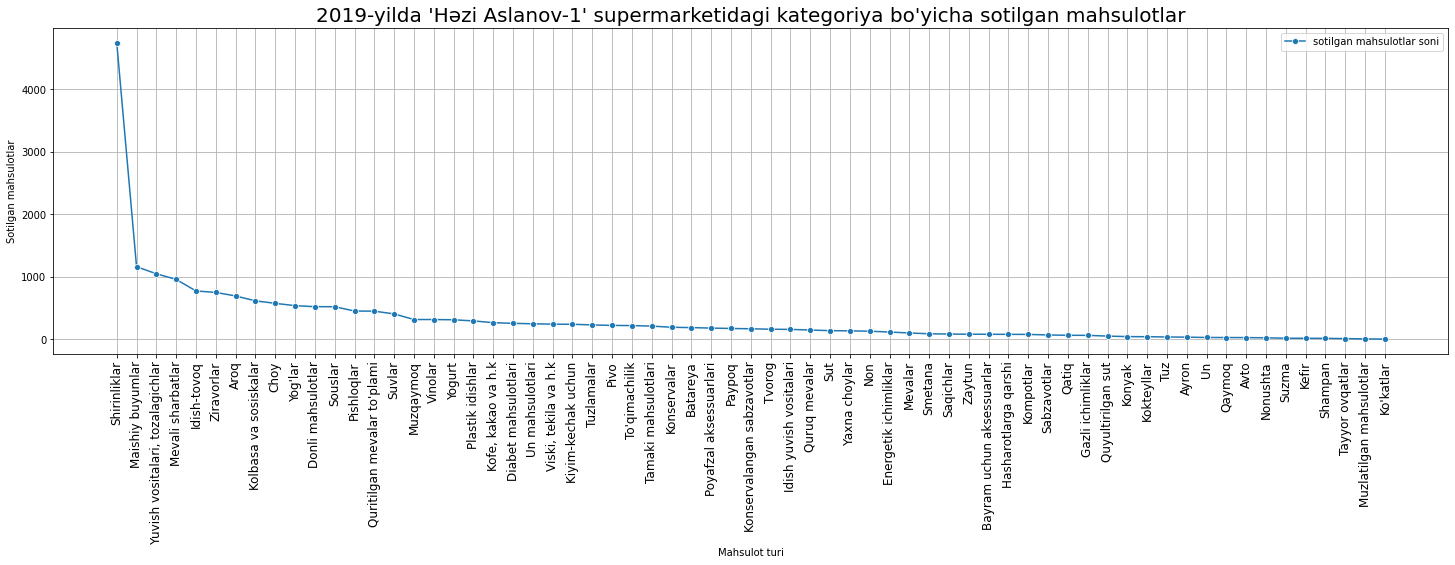

In [37]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda 'Həzi Aslanov-1' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [38]:
#10 2019-yilda "Həzi Aslanov-1" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,10186.79
Avto,127.11
Ayron,21.95
Batareya,778.42
Bayram uchun aksessuarlar,224.21
...,...
Yog'lar,5174.91
Yogurt,378.54


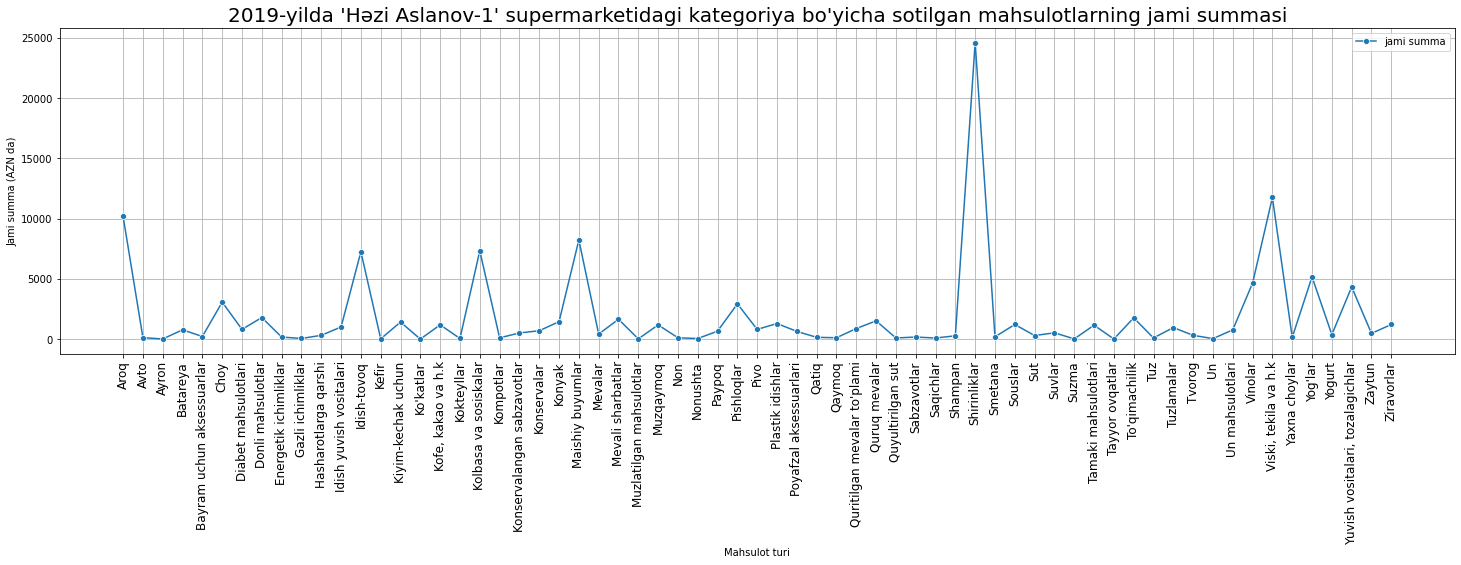

In [39]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda 'Həzi Aslanov-1' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [40]:
#11 2019-yilda "Həzi Aslanov-1" supermarketida nechta mijoz mahsulotni bonus karta orqali 
# xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10412,10221


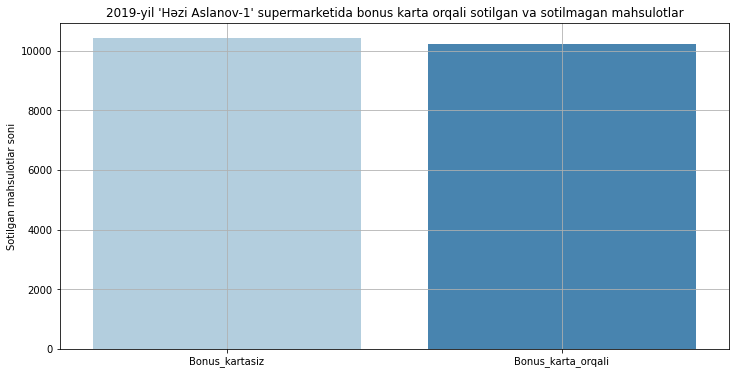

In [41]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil 'Həzi Aslanov-1' supermarketida bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [42]:
#12 2019-yilda "Həzi Aslanov-1" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,2084
Fevral,1843
Mart,2233
Aprel,2121
May,2141
Iyun,2082
Iyul,2023
Avgust,2063
Sentabr,2012
Oktabr,2031


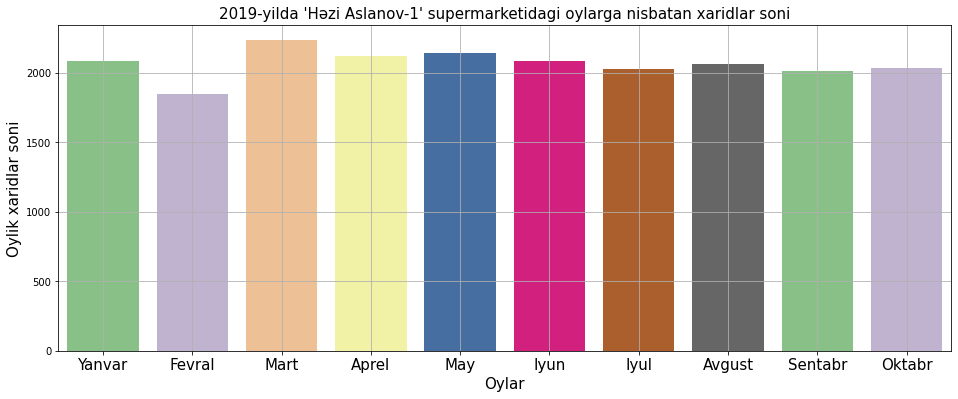

In [43]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda 'Həzi Aslanov-1' supermarketidagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [44]:
#13 2019-yilda "Həzi Aslanov-1" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,2851
Seshanba,2816
Chorshanba,2817
Payshanba,3073
Juma,2847
Shanba,3158
Yakshanba,3071


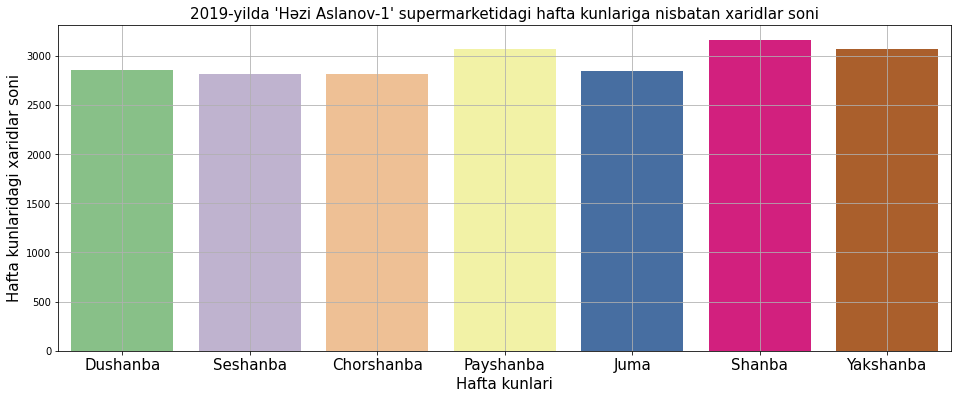

In [45]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda 'Həzi Aslanov-1' supermarketidagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [46]:
#14 2019-yilda "Həzi Aslanov-1" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,719
2,625
3,700
4,735
5,654
6,770
7,740
8,660
9,612
10,632


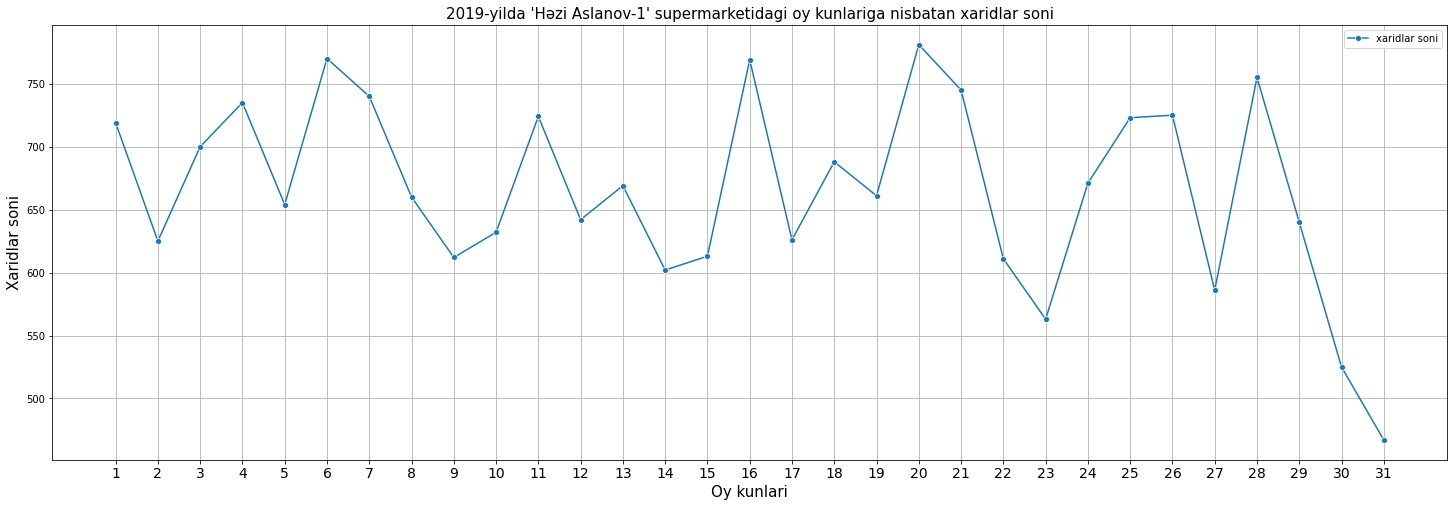

In [47]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda 'Həzi Aslanov-1' supermarketidagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [48]:
#15 2019-yil 'Həzi Aslanov-1' supermarketidagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [49]:
len(oy_sanalari)

310

In [50]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [51]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [52]:
df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Yanvar,40,95,70,73,52,88,58,69,65,57,98,65,75,59,76,75,74,44,61,80,83,57,17,77,102,83,44,65,68,43,71
Fevral,73,60,48,77,46,70,112,42,72,52,72,84,32,61,67,102,57,72,56,57,76,56,91,63,58,83,50,54,0,0,0
Mart,79,81,76,87,62,109,64,77,68,49,78,84,102,70,55,90,103,61,33,55,68,109,65,89,64,63,41,55,60,47,89
Aprel,62,40,46,70,55,97,100,44,72,55,35,52,81,62,75,109,86,99,68,101,91,46,105,80,79,63,62,119,41,26,0
May,101,65,89,86,73,78,68,56,84,61,82,78,41,51,31,69,54,74,75,106,72,71,65,32,77,63,60,74,81,65,59
Iyun,67,80,53,72,59,57,44,100,45,89,62,74,47,35,52,55,52,60,66,75,105,79,62,75,84,71,74,71,127,90,0
Iyul,74,44,53,60,79,58,108,54,54,56,81,57,94,61,46,60,56,55,72,76,91,77,51,71,50,64,47,52,66,45,111
Avgust,112,58,84,52,72,86,64,68,53,68,86,58,57,72,66,43,25,68,89,87,52,54,23,87,74,49,49,88,75,78,66
Sentabr,30,51,104,55,86,62,65,66,61,66,46,53,35,67,68,130,44,67,67,82,73,42,33,49,96,103,104,62,80,65,0
Oktabr,81,51,77,103,70,65,57,84,38,79,84,37,105,64,77,36,75,88,74,62,34,20,51,48,39,83,55,115,42,66,71


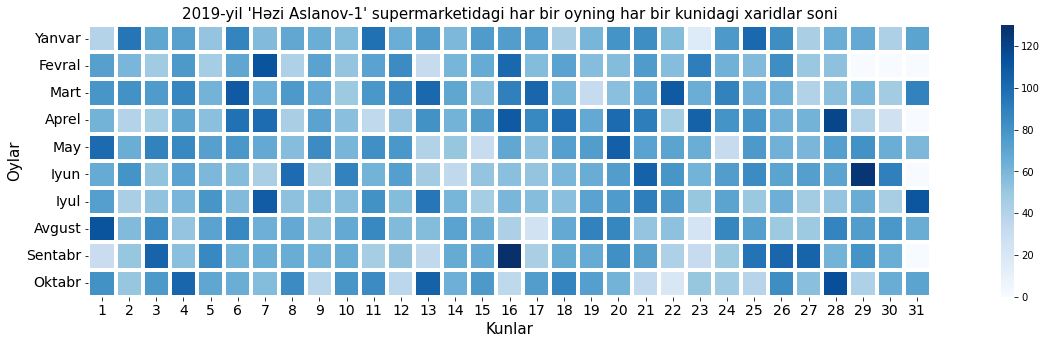

In [53]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil 'Həzi Aslanov-1' supermarketidagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

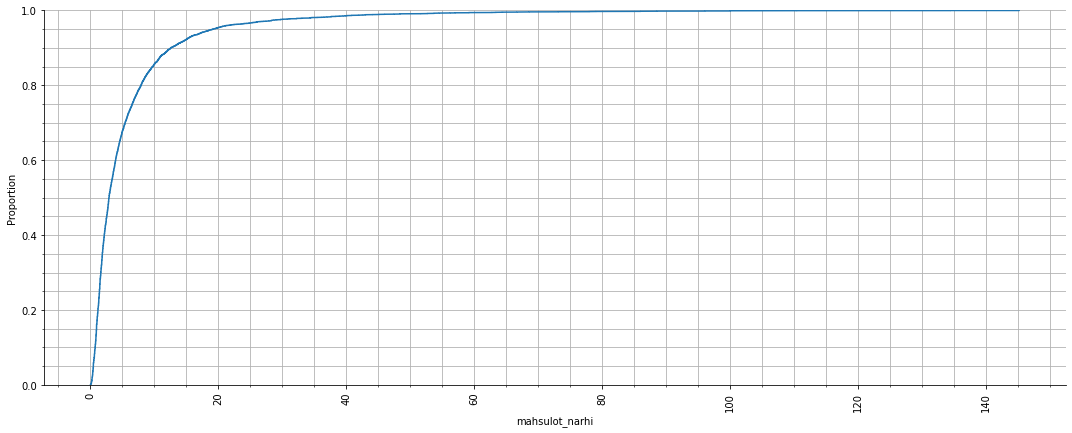

In [55]:
#16 Ko'rinadiki, sotilgan mahsulotlarning 50% i 3 azngacha, 90% i esa 14 azngacha bo'lgan mahsulotlar
sns.displot(data=df, x='mahsulot_narhi', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()